In [1]:
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

# __DATA EXPLORATION__

In [2]:
data = pd.read_parquet(Path("data") / "train.parquet")
data.head()

,counter_id,counter_name,site_id,site_name,bike_count,date,counter_installation_date,coordinates,counter_technical_id,latitude,longitude,log_bike_count
48321,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,0.0,2020-09-01 02:00:00,2013-01-18,"48.846028,2.375429",Y2H15027244,48.846028,2.375429,0.000000
48324,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,1.0,2020-09-01 03:00:00,2013-01-18,"48.846028,2.375429",Y2H15027244,48.846028,2.375429,0.693147
48327,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,0.0,2020-09-01 04:00:00,2013-01-18,"48.846028,2.375429",Y2H15027244,48.846028,2.375429,0.000000
48330,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,4.0,2020-09-01 15:00:00,2013-01-18,"48.846028,2.375429",Y2H15027244,48.846028,2.375429,1.609438
48333,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,9.0,2020-09-01 18:00:00,2013-01-18,"48.846028,2.375429",Y2H15027244,48.846028,2.375429,2.302585


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 496827 entries, 48321 to 929187
Data columns (total 12 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   counter_id                 496827 non-null  category      
 1   counter_name               496827 non-null  category      
 2   site_id                    496827 non-null  int64         
 3   site_name                  496827 non-null  category      
 4   bike_count                 496827 non-null  float64       
 5   date                       496827 non-null  datetime64[us]
 6   counter_installation_date  496827 non-null  datetime64[us]
 7   coordinates                496827 non-null  category      
 8   counter_technical_id       496827 non-null  category      
 9   latitude                   496827 non-null  float64       
 10  longitude                  496827 non-null  float64       
 11  log_bike_count             496827 non-null  float64  

In [4]:
data.nunique(axis=0)

counter_id                     56
counter_name                   56
site_id                        30
site_name                      30
bike_count                    998
date                         8974
counter_installation_date      22
coordinates                    30
counter_technical_id           30
latitude                       30
longitude                      30
log_bike_count                998
dtype: int64

In [5]:
(
    data.groupby(["site_name", "counter_name"])["bike_count"].sum()
    .sort_values(ascending=False)
    .head(10)
    .to_frame()
)

/var/folders/kw/8v5sq5616c9bt_3ddzy97nq40000gn/T/ipykernel_43693/1192055722.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby(["site_name", "counter_name"])["bike_count"].sum()


,,bike_count
site_name,counter_name,
Totem 73 boulevard de Sébastopol,Totem 73 boulevard de Sébastopol S-N,1992227.0
Totem 64 Rue de Rivoli,Totem 64 Rue de Rivoli O-E,1551730.0
Totem 73 boulevard de Sébastopol,Totem 73 boulevard de Sébastopol N-S,1497912.0
67 boulevard Voltaire SE-NO,67 boulevard Voltaire SE-NO,1130565.0
Totem 64 Rue de Rivoli,Totem 64 Rue de Rivoli E-O,1015875.0
27 quai de la Tournelle,27 quai de la Tournelle SE-NO,984914.0
Quai d'Orsay,Quai d'Orsay E-O,948357.0
Totem Cours la Reine,Totem Cours la Reine O-E,894937.0
Face au 48 quai de la marne,Face au 48 quai de la marne SO-NE,884907.0


# __FEATURE ENGINEERING__

In [6]:
def _encode_dates(X):
    X = X.copy()  # modify a copy of X
    # Encode the date information from the DateOfDeparture columns
    X["year"] = X["date"].dt.year
    X["month"] = X["date"].dt.month
    X["day"] = X["date"].dt.day
    X["weekday"] = X["date"].dt.weekday
    X["hour"] = X["date"].dt.hour

    # We do not drop the original column that can be useful for more feature
    # engineering
    return X

In [7]:
data = _encode_dates(data)
data.head()

,counter_id,counter_name,site_id,site_name,bike_count,date,counter_installation_date,coordinates,counter_technical_id,latitude,longitude,log_bike_count,year,month,day,weekday,hour
48321,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,0.0,2020-09-01 02:00:00,2013-01-18,"48.846028,2.375429",Y2H15027244,48.846028,2.375429,0.000000,2020,9,1,1,2
48324,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,1.0,2020-09-01 03:00:00,2013-01-18,"48.846028,2.375429",Y2H15027244,48.846028,2.375429,0.693147,2020,9,1,1,3
48327,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,0.0,2020-09-01 04:00:00,2013-01-18,"48.846028,2.375429",Y2H15027244,48.846028,2.375429,0.000000,2020,9,1,1,4
48330,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,4.0,2020-09-01 15:00:00,2013-01-18,"48.846028,2.375429",Y2H15027244,48.846028,2.375429,1.609438,2020,9,1,1,15
48333,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,9.0,2020-09-01 18:00:00,2013-01-18,"48.846028,2.375429",Y2H15027244,48.846028,2.375429,2.302585,2020,9,1,1,18


In [8]:
# We will add other columns:

from datetime import datetime

# Weekends:
data["is_weekend"] = data["weekday"].isin([5, 6]).astype(int)

# Public holidays:
french_holidays = [
    # 2020 Holidays
    datetime(2020, 1, 1),   # New Year's Day
    datetime(2020, 4, 13),  # Easter Monday
    datetime(2020, 5, 1),   # Labor Day
    datetime(2020, 5, 8),   # Victory in Europe Day
    datetime(2020, 5, 21),  # Ascension Day
    datetime(2020, 6, 1),   # Whit Monday
    datetime(2020, 7, 14),  # Bastille Day
    datetime(2020, 8, 15),  # Assumption Day
    datetime(2020, 11, 1),  # All Saints' Day
    datetime(2020, 11, 11), # Armistice Day
    datetime(2020, 12, 25), # Christmas Day

    # 2021 Holidays
    datetime(2021, 1, 1),   # New Year's Day
    datetime(2021, 4, 5),   # Easter Monday
    datetime(2021, 5, 1),   # Labor Day
    datetime(2021, 5, 8),   # Victory in Europe Day
    datetime(2021, 5, 13),  # Ascension Day
    datetime(2021, 5, 24),  # Whit Monday
    datetime(2021, 7, 14),  # Bastille Day
    datetime(2021, 8, 15),  # Assumption Day
    datetime(2021, 11, 1),  # All Saints' Day
    datetime(2021, 11, 11), # Armistice Day
    datetime(2021, 12, 25), # Christmas Day
]
data["is_holiday"] = data["date"].isin(french_holidays).astype(int)

# Is a workday:
data["is_workday"] = (~data["is_weekend"] & ~data["is_holiday"]).astype(int)

# We add cyclical columns for months and weeks, for Python not to interpret
# this data as linear:
data["month_sin"] = np.sin(2 * np.pi * data["month"] / 12)
data["month_cos"] = np.cos(2 * np.pi * data["month"] / 12)

data["weekday_sin"] = np.sin(2 * np.pi * data["weekday"] / 7)
data["weekday_cos"] = np.cos(2 * np.pi * data["weekday"] / 7)

In [9]:
# We will add the arrondissements of Paris in which we are located:
arrondissement_ranges = {
    1: ((48.861992, 48.865215), (2.332125, 2.336405)),  # 1st arrondissement
    2: ((48.863206, 48.866611), (2.341881, 2.347173)),  # 2nd arrondissement
    3: ((48.861255, 48.865822), (2.360033, 2.367505)),  # 3rd arrondissement
    4: ((48.843799, 48.861194), (2.354573, 2.365420)),  # 4th arrondissement
    5: ((48.831783, 48.843197), (2.342185, 2.354164)),  # 5th arrondissement
    6: ((48.841360, 48.851082), (2.322960, 2.335156)),  # 6th arrondissement
    7: ((48.855246, 48.861785), (2.292324, 2.304169)),  # 7th arrondissement
    8: ((48.871865, 48.876433), (2.298935, 2.316489)),  # 8th arrondissement
    9: ((48.878293, 48.886988), (2.332082, 2.342776)),  # 9th arrondissement
    10: ((48.867081, 48.877137), (2.354785, 2.368476)), # 10th arrondissement
    11: ((48.860539, 48.868028), (2.368059, 2.377489)), # 11th arrondissement
    12: ((48.838929, 48.853496), (2.372685, 2.395029)), # 12th arrondissement
    13: ((48.832859, 48.845874), (2.364123, 2.377156)), # 13th arrondissement
    14: ((48.835038, 48.844455), (2.308681, 2.334001)), # 14th arrondissement
    15: ((48.846062, 48.868057), (2.285918, 2.314678)), # 15th arrondissement
    16: ((48.846780, 48.876165), (2.246473, 2.296048)), # 16th arrondissement
    17: ((48.873200, 48.887113), (2.284953, 2.319586)), # 17th arrondissement
    18: ((48.877165, 48.895797), (2.324915, 2.363556)), # 18th arrondissement
    19: ((48.868440, 48.886066), (2.377394, 2.396128)), # 19th arrondissement
    20: ((48.855109, 48.873755), (2.382319, 2.411434))  # 20th arrondissement
}

def find_arrondissement(lat, lon):
    for arr, ((lat_min, lat_max), (lon_min, lon_max)) in arrondissement_ranges.items():
        if lat_min <= lat <= lat_max and lon_min <= lon <= lon_max:
            return arr
    return None

data['arrondissement'] = data.apply(lambda row: find_arrondissement(row['latitude'], row['longitude']), axis=1)


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 496827 entries, 48321 to 929187
Data columns (total 25 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   counter_id                 496827 non-null  category      
 1   counter_name               496827 non-null  category      
 2   site_id                    496827 non-null  int64         
 3   site_name                  496827 non-null  category      
 4   bike_count                 496827 non-null  float64       
 5   date                       496827 non-null  datetime64[us]
 6   counter_installation_date  496827 non-null  datetime64[us]
 7   coordinates                496827 non-null  category      
 8   counter_technical_id       496827 non-null  category      
 9   latitude                   496827 non-null  float64       
 10  longitude                  496827 non-null  float64       
 11  log_bike_count             496827 non-null  float64  

In [16]:
# We drop some redundant columns:
data = data.drop(columns=['counter_id', 'site_id', 'bike_count', 'date', 'coordinates', 'month', 'weekday', 'is_workday'])

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 496827 entries, 48321 to 929187
Data columns (total 25 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   counter_id                 496827 non-null  category      
 1   counter_name               496827 non-null  category      
 2   site_id                    496827 non-null  int64         
 3   site_name                  496827 non-null  category      
 4   bike_count                 496827 non-null  float64       
 5   date                       496827 non-null  datetime64[us]
 6   counter_installation_date  496827 non-null  datetime64[us]
 7   coordinates                496827 non-null  category      
 8   counter_technical_id       496827 non-null  category      
 9   latitude                   496827 non-null  float64       
 10  longitude                  496827 non-null  float64       
 11  log_bike_count             496827 non-null  float64  

<Axes: >

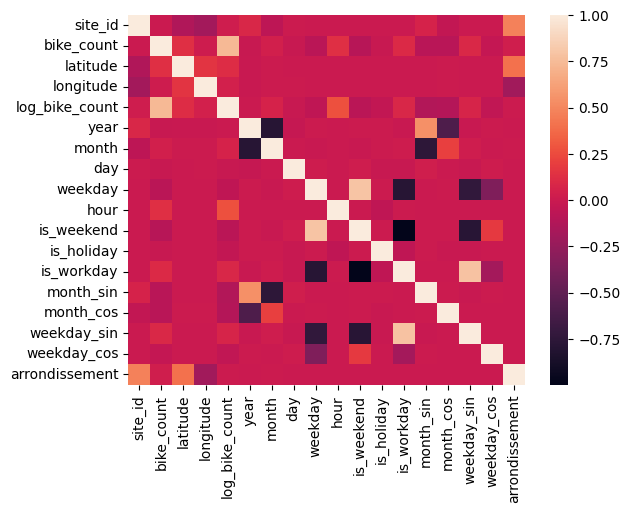

In [12]:
import seaborn as sns

numeric_features_names = data.select_dtypes(include=np.number).columns.to_list()
correlation_matrix = data[numeric_features_names].corr()
sns.heatmap(correlation_matrix)


# __PIPELINE CREATION__

In [13]:
X = data.drop(columns=["log_bike_count"])  # Features
y = data["log_bike_count"]  # Target

In [14]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.ensemble import HistGradientBoostingClassifier

# We initiate the columns names by types:
numeric_features_names = data.select_dtypes(include=np.number).columns.difference(["log_bike_count"]).to_list()
categorical_features_names = data.select_dtypes(exclude=np.number).columns.to_list()

# We define the preprocessors, depengin on the type of features:
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown="ignore", sparse_output=False)

# We create a column transformer:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numerical_transformer, numeric_features_names),
        ("cat", categorical_transformer, categorical_features_names),
    ]
)

# We define a the pipeline with XGBoost
model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", HistGradientBoostingClassifier(random_state=42))
])

In [15]:
model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['arrondissement',
                                                   'bike_count', 'day', 'hour',
                                                   'is_holiday', 'is_weekend',
                                                   'is_workday', 'latitude',
                                                   'longitude', 'month',
                                                   'month_cos', 'month_sin',
                                                   'site_id', 'weekday',
                                                   'weekday_cos', 'weekday_sin',
                                                   'year']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['counter_id', 'counter_name',
                                                   'site_name', 'date',
                                                   'counter_installation_date',
                                                   'coordinates',
                                                   'counter_technical_id'])])),
                ('regressor', HistGradientBoostingClassifier(random_state=42))])

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

# We train/test:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Root Mean Squared Error: {rmse}")

: 

# __CROSS VAL - MODEL SELECTION__

In [ ]:
# TODO

# __HYPERPARAMETER TUNING__

In [ ]:
# TODO

# __MODEL VALIDATION__

In [ ]:
# TODO